In [1]:
%pip install  datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 521.2/521.2 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 11.4 MB/s eta 0:00:00


In [2]:
# import packages
from datasets import load_dataset
import pandas as pd
import nltk
import pickle
from nltk.stem.snowball import FrenchStemmer
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
import string
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences



string.punctuation

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


# load data
def load_data():
        """
        load data
        """
        return load_dataset('Nicolas-BZRD/Parallel_Global_Voices_English_French',
                                    split='train').to_pandas()


def remove_punctuation(text):
        """
        defining the function to remove punctuation
        """
        punctuation_free="".join([i for i in text if i not in string.punctuation])
        return punctuation_free


def save_punct_free(df):
        """
        storing the puntuation free text
        Args:
            df - df to update
        """
        df['en'] = df['en'].apply(lambda x:remove_punctuation(x))
        df['fr'] = df['fr'].apply(lambda x:remove_punctuation(x))
        return df


def lower_case(df):
        """
        change text to lower case
        Args:
            df - df to update
        """
        df['en'] = df['en'].apply(lambda x: x.lower())
        df['fr'] = df['fr'].apply(lambda x: x.lower())
        return df


def tokenize_data(df):
        """
        tokenize text i.e splits text in to words in a list
        Args:
            df - df to update
        """
        new_df = pd.DataFrame()
        # df.apply(lambda row: len(row['tokenized_sents']), axis=1)
        new_df['en'] = df.apply(lambda row: nltk.word_tokenize(row['en']), axis=1)
        new_df['fr'] = df.apply(lambda row: nltk.word_tokenize(row['fr']), axis=1)
        return new_df


def get_word_index(column):
        """
        Args: column - column to get word index on for sequencing
        """
        # name out of vocabulary character and tokenize
        tokenizer = Tokenizer(num_words=100, oov_token='<OOV>')

        # fit tokenizer on text
        tokenizer.fit_on_texts(column.tolist())

        # convert words to  index
        word_to_index = tokenizer.word_index

        # convert index to word
        index_to_word = {idx: word for word, idx in word_to_index.items()}

        # create sequences with word indexes
        sequences = tokenizer.texts_to_sequences(column.tolist())
        # print(f'Word index: {word_to_index}')
        # print(f'\nSequences: {sequences}')

        return word_to_index, index_to_word, sequences


def add_padding(column, sequences):
        '''
        Args: column - column to be padded
              sequences - encoded word sequence
        '''
        lengths_of_rows = [len(row) for row in column.tolist()]
        max_len = max(lengths_of_rows)
        padded_seqs = pad_sequences(sequences, maxlen=max_len, padding='post',)
        # print(f'Padded sequences: {padded_seqs}')
        return padded_seqs, max_len


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [3]:

# import attention_based_ae as ab_ae
import pandas as pd
import pickle
# import tensorfow as tf
# import tensorflow_addons as tfa

# make constants
MODEL_NAME = 'distilbert-base-uncased'
MAX_LEN = 20

# preprocessing
original_translation_dataset_train = load_data()

# just for set up
translation_dataset = original_translation_dataset_train[:100]
val_translation_dataset = original_translation_dataset_train[101: 121]
test_translation_data = original_translation_dataset_train[-101:]

translation_dataset = save_punct_free(df=translation_dataset)
translation_dataset = lower_case(translation_dataset)
tok_translation_dataset = tokenize_data(translation_dataset)
# print(translation_dataset.head())


# sequencing
# english
en_word_idx, en_idx_word, en_sequences = get_word_index(translation_dataset['en'])

# padding
en_padded_seqs, max_len_en = add_padding(column=translation_dataset['en'], sequences=en_sequences)
X = en_padded_seqs

# french
# sequencing
fr_word_idx, fr_idx_word, fr_sequences = get_word_index(translation_dataset['fr'])

# padding
fr_padded_seqs, max_len_fr = add_padding(column=translation_dataset['fr'], sequences=fr_sequences)
y = fr_padded_seqs

print(X)
pickle.dump( X, open( "X.pkl", "wb" ) )
pickle.dump( y, open( "y.pkl", "wb" ) )
# X = pickle.load( open( "X.pkl", "rb" ) )
# y = pickle.load( open( "y.pkl", "rb" ) )



Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/342060 [00:00<?, ? examples/s]

[[89  1  1 ...  0  0  0]
 [ 1  1  1 ...  0  0  0]
 [10 29  1 ...  0  0  0]
 ...
 [ 1 19 79 ...  0  0  0]
 [ 7 84  1 ...  0  0  0]
 [ 1 78  5 ...  0  0  0]]


<ipython-input-2-e3cece1c4ebc>:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['en'] = df['en'].apply(lambda x:remove_punctuation(x))
<ipython-input-2-e3cece1c4ebc>:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['fr'] = df['fr'].apply(lambda x:remove_punctuation(x))
<ipython-input-2-e3cece1c4ebc>:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pand

### Build transformer

In [4]:
from __future__ import absolute_import, division, print_function

# from keras.layers import Input, Dense, Reshape, Flatten, Dropout, MaxPooling2D, Lambda
# from keras.layers import BatchNormalization, Activation, ZeroPadding2D
# from keras.layers.advanced_activations import LeakyReLU
# from keras.layers.convolutional import UpSampling2D, Conv2D
from keras.models import Sequential, Model
from keras.optimizers import Adam
# import keras.losses as Losses
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from keras import layers, losses
import tensorflow as tf
#import keras.backend as K

import random
import matplotlib.pyplot as plt
import sys
import numpy as np


def positional_encoding(length, depth):
  """
  gets the positional encoding of a sentence
  """
  depth = depth/2

  positions = np.arange(length)[:, np.newaxis]     # (seq, 1)
  depths = np.arange(depth)[np.newaxis, :]/depth   # (1, depth)

  angle_rates = 1 / (10000**depths)         # (1, depth)
  angle_rads = positions * angle_rates      # (pos, depth)

  pos_encoding = np.concatenate(
      [np.sin(angle_rads), np.cos(angle_rads)],
      axis=-1)

  return tf.cast(pos_encoding, dtype=tf.float32)


def masked_loss(label, pred):
  mask = label != 0
  loss_object = tf.keras.losses.SparseCategoricalCrossentropy(
    from_logits=True, reduction='none')
  loss = loss_object(label, pred)

  mask = tf.cast(mask, dtype=loss.dtype)
  loss *= mask

  loss = tf.reduce_sum(loss)/tf.reduce_sum(mask)
  return loss


def masked_accuracy(label, pred):
  pred = tf.argmax(pred, axis=2)
  label = tf.cast(label, pred.dtype)
  match = label == pred

  mask = label != 0

  match = match & mask

  match = tf.cast(match, dtype=tf.float32)
  mask = tf.cast(mask, dtype=tf.float32)
  return tf.reduce_sum(match)/tf.reduce_sum(mask)


class CustomSchedule(tf.keras.optimizers.schedules.LearningRateSchedule):
  def __init__(self, d_model, warmup_steps=4000):
    super().__init__()

    self.d_model = d_model
    self.d_model = tf.cast(self.d_model, tf.float32)

    self.warmup_steps = warmup_steps

  def __call__(self, step):
    step = tf.cast(step, dtype=tf.float32)
    arg1 = tf.math.rsqrt(step)
    arg2 = step * (self.warmup_steps ** -1.5)

    return tf.math.rsqrt(self.d_model) * tf.math.minimum(arg1, arg2)


class PositionalEmbedding(tf.keras.layers.Layer):
  def __init__(self, vocab_size, d_model):
    super().__init__()
    self.d_model = d_model
    self.embedding = tf.keras.layers.Embedding(vocab_size, d_model, mask_zero=True)
    self.pos_encoding = positional_encoding(length=2048, depth=d_model)

  def compute_mask(self, *args, **kwargs):
    """
    computes embedding mask
    """
    return self.embedding.compute_mask(*args, **kwargs)

  def call(self, x):
    """
    execute positional embedding
    """
    length = tf.shape(x)[1]
    x = self.embedding(x)
    # This factor sets the relative scale of the embedding and positonal_encoding.
    x *= tf.math.sqrt(tf.cast(self.d_model, tf.float32))
    x = x + self.pos_encoding[tf.newaxis, :length, :]
    return x


class BaseAttention(tf.keras.layers.Layer):
  def __init__(self, **kwargs):
    super().__init__()
    self.mha = tf.keras.layers.MultiHeadAttention(**kwargs)
    self.layernorm = tf.keras.layers.LayerNormalization()
    self.add = tf.keras.layers.Add()


class CrossAttention(BaseAttention):
  def call(self, x, context):
    """
    execute cross attention
    """
    attn_output, attn_scores = self.mha(
        query=x,
        key=context,
        value=context,
        return_attention_scores=True)

    # Cache the attention scores for plotting later.
    self.last_attn_scores = attn_scores

    x = self.add([x, attn_output])
    x = self.layernorm(x)

    return x


class GlobalSelfAttention(BaseAttention):
  def call(self, x):
    """
    execute global self attention
    """
    attn_output = self.mha(
        query=x,
        value=x,
        key=x)
    x = self.add([x, attn_output])
    x = self.layernorm(x)
    return x


class CausalSelfAttention(BaseAttention):
  def call(self, x):
    attn_output = self.mha(
        query=x,
        value=x,
        key=x,
        use_causal_mask = True)
    x = self.add([x, attn_output])
    x = self.layernorm(x)
    return x


class FeedForward(tf.keras.layers.Layer):

  def __init__(self, d_model, dff, dropout_rate=0.1):
    super().__init__()
    self.seq = tf.keras.Sequential([
      tf.keras.layers.Dense(dff, activation='relu'),
      tf.keras.layers.Dense(d_model),
      tf.keras.layers.Dropout(dropout_rate)
    ])
    self.add = tf.keras.layers.Add()
    self.layer_norm = tf.keras.layers.LayerNormalization()

  def call(self, x):
    """
    execute feed forward network
    """
    x = self.add([x, self.seq(x)])
    x = self.layer_norm(x)
    return x


class EncoderLayer(tf.keras.layers.Layer):
  def __init__(self,*, d_model, num_heads, dff, dropout_rate=0.1):
    super().__init__()

    self.self_attention = GlobalSelfAttention(
        num_heads=num_heads,
        key_dim=d_model,
        dropout=dropout_rate)

    self.ffn = FeedForward(d_model, dff)

  def call(self, x):
    """
    execure encoder layer with self attention
    """
    x = self.self_attention(x)
    x = self.ffn(x)
    return x


class Encoder(tf.keras.layers.Layer):
  def __init__(self, *, num_layers, d_model, num_heads,
               dff, vocab_size, dropout_rate=0.1):
    """
    Args:
          num_layers - desired number of encoder layers
          dff - dimensionality of outter space
          vocab_size - input dimensin / vocabulary size
          dropout_rate - dropout probability.
    """
    super().__init__()

    self.d_model = d_model
    self.num_layers = num_layers

    self.pos_embedding = PositionalEmbedding(
        vocab_size=vocab_size, d_model=d_model)

    self.enc_layers = [
        EncoderLayer(d_model=d_model,
                     num_heads=num_heads,
                     dff=dff,
                     dropout_rate=dropout_rate)
        for _ in range(num_layers)]
    self.dropout = tf.keras.layers.Dropout(dropout_rate)

  def call(self, x):
    """
    execute encoder
    """

    # do a positional embedding
    # `x` is token-IDs shape: (batch, seq_len)
    x = self.pos_embedding(x)  # Shape `(batch_size, seq_len, d_model)`.

    # Add dropout.
    x = self.dropout(x)

    for i in range(self.num_layers):
      x = self.enc_layers[i](x)

    return x  # Shape `(batch_size, seq_len, d_model)`.


class DecoderLayer(tf.keras.layers.Layer):
  def __init__(self,
               *,
               d_model,
               num_heads,
               dff,
               dropout_rate=0.1):
    super(DecoderLayer, self).__init__()

    self.causal_self_attention = CausalSelfAttention(
        num_heads=num_heads,
        key_dim=d_model,
        dropout=dropout_rate)

    self.cross_attention = CrossAttention(
        num_heads=num_heads,
        key_dim=d_model,
        dropout=dropout_rate)

    self.ffn = FeedForward(d_model, dff)

  def call(self, x, context):
    x = self.causal_self_attention(x=x)
    x = self.cross_attention(x=x, context=context)

    # Cache the last attention scores for plotting later
    self.last_attn_scores = self.cross_attention.last_attn_scores

    x = self.ffn(x)  # Shape `(batch_size, seq_len, d_model)`.
    return x


class Decoder(tf.keras.layers.Layer):
  def __init__(self, *, num_layers, d_model, num_heads, dff, vocab_size,
               dropout_rate=0.1):
    super(Decoder, self).__init__()

    self.d_model = d_model
    self.num_layers = num_layers

    self.pos_embedding = PositionalEmbedding(vocab_size=vocab_size,
                                             d_model=d_model)
    self.dropout = tf.keras.layers.Dropout(dropout_rate)
    self.dec_layers = [
        DecoderLayer(d_model=d_model, num_heads=num_heads,
                     dff=dff, dropout_rate=dropout_rate)
        for _ in range(num_layers)]

    self.last_attn_scores = None

  def call(self, x, context):
    # `x` is token-IDs shape (batch, target_seq_len)
    x = self.pos_embedding(x)  # (batch_size, target_seq_len, d_model)

    x = self.dropout(x)

    for i in range(self.num_layers):
      x  = self.dec_layers[i](x, context)

    self.last_attn_scores = self.dec_layers[-1].last_attn_scores

    # The shape of x is (batch_size, target_seq_len, d_model).
    return x


class Transformer(tf.keras.Model):
  def __init__(self, *, num_layers, d_model, num_heads, dff,
               input_vocab_size, target_vocab_size, dropout_rate=0.1):
    super().__init__()
    self.encoder = Encoder(num_layers=num_layers, d_model=d_model,
                           num_heads=num_heads, dff=dff,
                           vocab_size=input_vocab_size,
                           dropout_rate=dropout_rate)

    self.decoder = Decoder(num_layers=num_layers, d_model=d_model,
                           num_heads=num_heads, dff=dff,
                           vocab_size=target_vocab_size,
                           dropout_rate=dropout_rate)

    self.final_layer = tf.keras.layers.Dense(target_vocab_size)

  def call(self, inputs):
    # To use a Keras model with `.fit` you must pass all your inputs in the
    # first argument.
    context, x  = inputs

    context = self.encoder(context)  # (batch_size, context_len, d_model)

    x = self.decoder(x, context)  # (batch_size, target_len, d_model)

    # Final linear layer output.
    logits = self.final_layer(x)  # (batch_size, target_len, target_vocab_size)

    try:
      # Drop the keras mask, so it doesn't scale the losses/metrics.
      # b/250038731
      del logits._keras_mask
    except AttributeError:
      pass

    # Return the final output and the attention weights.
    return logits

## train-val

In [12]:
en_padded_seqs = pickle.load( open( "X.pkl", "rb" ) )
fr_padded_seqs = pickle.load( open( "y.pkl", "rb" ) )


en_padded_seqs_train, en_padded_seqs_val = en_padded_seqs[:80], en_padded_seqs[81:]
fr_padded_seqs_train, fr_padded_seqs_val = fr_padded_seqs[:80], en_padded_seqs[81:]

In [13]:
en_padded_seqs_train.shape

(80, 359)

### Test transformer

In [14]:
embed_en = PositionalEmbedding(vocab_size=len(en_idx_word), d_model=512)
embed_fr = PositionalEmbedding(vocab_size=len(fr_idx_word), d_model=512)

en_emb = embed_en(en_padded_seqs_train)
fr_emb = embed_fr(fr_padded_seqs_train)
# print(f"en_emb - {en_emb}")
# print(f"fr_emb - {fr_emb}")


# sample_ca = CrossAttention(num_heads=2, key_dim=512)

# print(en_emb.shape)
# print(fr_emb.shape)
# print(sample_ca(fr_emb, en_emb).shape)


# sample_gsa = GlobalSelfAttention(num_heads=2, key_dim=512)

# print(en_emb.shape)
# print(sample_gsa(en_emb).shape)


# sample_csa = CausalSelfAttention(num_heads=2, key_dim=512)

# print(fr_emb.shape)
# print(sample_csa(fr_emb).shape)


# sample_ffn = FeedForward(512, 2048)

# print(fr_emb.shape)
# print(sample_ffn(fr_emb).shape)


# sample_encoder_layer = EncoderLayer(d_model=512, num_heads=8, dff=2048)

# print(en_emb.shape)
# print(sample_encoder_layer(en_emb).shape)


# sample_decoder_layer = DecoderLayer(d_model=512, num_heads=8, dff=2048)

# sample_decoder_layer_output = sample_decoder_layer(
#     x=fr_emb, context=en_emb)

# print(fr_emb.shape)
# print(en_emb.shape)
# print(sample_decoder_layer_output.shape)  # `(batch_size, seq_len, d_model)`



In [7]:
# en_padded_seqs = pickle.load( open( "X.pkl", "rb" ) )
# fr_padded_seqs = pickle.load( open( "y.pkl", "rb" ) )

# Instantiate the encoder.
sample_encoder = Encoder(num_layers=4,
                         d_model=512,
                         num_heads=8,
                         dff=2048,
                         vocab_size=8500)

sample_encoder_output = sample_encoder(en_padded_seqs, training=False)

# Print the shape.
print(en_padded_seqs.shape)
print(sample_encoder_output.shape)  # Shape `(batch_size, input_seq_len, d_model)`.

(101, 359)
(101, 359, 512)


In [8]:
# Instantiate the decoder.
sample_decoder = Decoder(num_layers=4,
                         d_model=512,
                         num_heads=8,
                         dff=2048,
                         vocab_size=8000)

output = sample_decoder(
    x=fr_padded_seqs,
    context=en_emb)

# Print the shapes.
print(fr_padded_seqs.shape)
print(en_emb.shape)
print(output.shape)

(101, 398)
(101, 359, 512)
(101, 398, 512)


In [15]:
num_layers = 4
d_model = 128
dff = 512
num_heads = 8
dropout_rate = 0.1

transformer = Transformer(
    num_layers=num_layers,
    d_model=d_model,
    num_heads=num_heads,
    dff=dff,
    input_vocab_size=len(en_idx_word),
    target_vocab_size=len(fr_idx_word),
    dropout_rate=dropout_rate)

# test it
output = transformer((en_padded_seqs_train, fr_padded_seqs_train))

print(fr_padded_seqs_train.shape)
print(en_padded_seqs_train.shape)
print(output.shape)

attn_scores = transformer.decoder.dec_layers[-1].last_attn_scores
print(attn_scores.shape)  # (batch, heads, target_seq, input_seq)

transformer.summary()

(80, 398)
(80, 359)
(80, 398, 889)
(80, 8, 398, 359)
Model: "transformer_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 encoder_2 (Encoder)         multiple                  2743808   
                                                                 
 decoder_2 (Decoder)         multiple                  4863616   
                                                                 
 dense_49 (Dense)            multiple                  114681    
                                                                 
Total params: 7722105 (29.46 MB)
Trainable params: 7722105 (29.46 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Text(0.5, 0, 'Train Step')

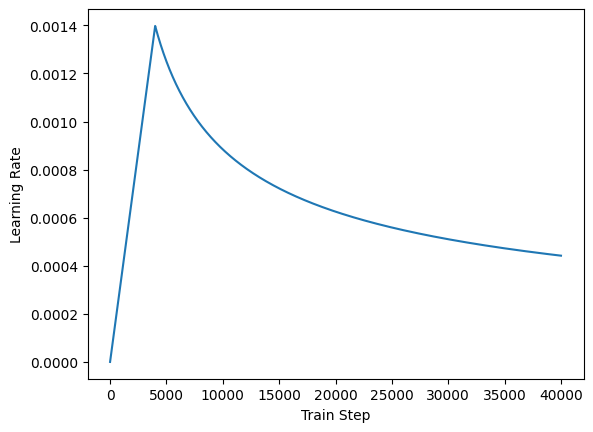

In [16]:
# instantiate optimizer
learning_rate = CustomSchedule(d_model)

optimizer = tf.keras.optimizers.Adam(learning_rate, beta_1=0.9, beta_2=0.98,
                                     epsilon=1e-9)

# set up the scheduler
plt.plot(learning_rate(tf.range(40000, dtype=tf.float32)))
plt.ylabel('Learning Rate')
plt.xlabel('Train Step')

In [18]:
train_batch = zip(en_padded_seqs_train, fr_padded_seqs_train)
validation_batch = zip(en_padded_seqs_val, fr_padded_seqs_val)

transformer.compile(
    loss=masked_loss,
    optimizer=optimizer,
    metrics=[masked_accuracy])
transformer.fit(train_batch,
                epochs=20,
                validation_data=validation_batch)

Epoch 1/20


OperatorNotAllowedInGraphError: ignored

In [ ]:


# # Prepare data for language modeling
# X, y = [], []
# for sequence in en_padded_seqs:
#     # for i in range(1, len(sequence)):
#     for i in range(1, 5):
#         X.append(sequence[:i])
#         y.append(sequence[i:i+1])  # Change this line to store each y value as a separate list
#     print(X)
#     print(y)
#     break

In [ ]:
import numpy as np
import tensorflow as tf


BUFFER_SIZE = len(X)
BATCH_SIZE = 64

tok_translation_dataset_np = tok_translation_dataset.copy()
target = tok_translation_dataset_np.pop('fr').to_numpy(dtype=object)
# target = np.asarray(target).astype(np.object)
context = tok_translation_dataset_np.to_numpy(dtype=object)
# context = np.asarray(context).astype(np.float32)
# print(type(target), type(context))

# create a tf dataset
# train_dataset = tf.data.Dataset.from_tensor_slices((train_examples, train_labels))
# test_dataset = tf.data.Dataset.from_tensor_slices((test_examples, test_labels))
context = tf.cast(context , dtype=tf.float32)
target = tf.cast(target , dtype=tf.float32)
# train = (
#                 tf.data.Dataset.from_tensor_slices((context, target))
#                 .shuffle(BUFFER_SIZE)
#                 .batch(BATCH_SIZE))


# train_raw = (
#                 tf.data.Dataset.from_tensor_slices((X[is_train], target_raw[is_train]))
#                 .shuffle(BUFFER_SIZE)
#                 .batch(BATCH_SIZE))
# val_raw = (
#     tf.data.Dataset
#     .from_tensor_slices((context_raw[~is_train], target_raw[~is_train]))
#     .shuffle(BUFFER_SIZE)
    # .batch(BATCH_SIZE))

In [ ]:
from keras.layers import TextVectorization

max_vocab_size = 5000

context_text_processor = TextVectorization(
    standardize=tf_lower_and_split_punct,
    max_tokens=max_vocab_size,
    ragged=True)